# ** Supermart Grocery Sales - Retail Analysis**

In [222]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [91]:
#import dataset
sale = pd.read_csv("C:/Users/shikh/Downloads/Supermart Grocery Sales - Retail Analytics Dataset.csv",
                  parse_dates = ['Order Date'],
                  dtype = ({'Sales':'int16'}),
                   
                  )
sale.drop("State", axis = 1, inplace = True)
sale.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44


## **Data Cleaning & manipulation**

In [92]:
sale.columns = sale.columns.str.strip().str.lower().str.replace(' ','_')


In [93]:
sale['order_date'] = sale['order_date'].astype(str).str.strip().str.replace('/','-')



In [94]:
sale['order_date'] = pd.to_datetime(sale['order_date'], format='%m-%d-%Y', errors='coerce')

sale.tail()

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,2018-04-17,West,1034,0.28,165.44


## **Data Exploration**

In [95]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   customer_name  9994 non-null   object        
 2   category       9994 non-null   object        
 3   sub_category   9994 non-null   object        
 4   city           9994 non-null   object        
 5   order_date     9994 non-null   datetime64[ns]
 6   region         9994 non-null   object        
 7   sales          9994 non-null   int16         
 8   discount       9994 non-null   float64       
 9   profit         9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int16(1), object(6)
memory usage: 722.4+ KB


In [98]:
sale.describe()

,order_date,sales,discount,profit
count,9994,9994.000000,9994.000000,9994.000000
mean,2017-04-30 05:17:08.056834048,1496.596158,0.226817,374.937082
min,2015-01-03 00:00:00,500.000000,0.100000,25.250000
25%,2016-05-23 00:00:00,1000.000000,0.160000,180.022500
50%,2017-06-26 00:00:00,1498.000000,0.230000,320.780000
75%,2018-05-14 00:00:00,1994.750000,0.290000,525.627500
max,2018-12-30 00:00:00,2500.000000,0.350000,1120.950000
std,NaN,577.559036,0.074636,239.932881


In [107]:
sale['category'].value_counts(dropna = False, ascending = True)

category
Oil & Masala         1361
Food Grains          1398
Beverages            1400
Bakery               1413
Fruits & Veggies     1418
Eggs, Meat & Fish    1490
Snacks               1514
Name: count, dtype: int64

In [124]:
sale['sub_category'].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

In [122]:
sale['city'].unique()

array(['Vellore', 'Krishnagiri', 'Perambalur', 'Dharmapuri', 'Ooty',
       'Trichy', 'Ramanadhapuram', 'Tirunelveli', 'Chennai', 'Karur',
       'Namakkal', 'Dindigul', 'Kanyakumari', 'Bodi', 'Tenkasi',
       'Viluppuram', 'Madurai', 'Salem', 'Cumbum', 'Nagercoil',
       'Pudukottai', 'Theni', 'Coimbatore', 'Virudhunagar'], dtype=object)

In [135]:
sale.sort_values("order_date", inplace = True)

## **Time Based Analysis**

In [208]:
sale = sale.assign(month = sale['order_date'].dt.month_name(),
            day_name = lambda x: x['order_date'].dt.day_name(),
            year = lambda x: x['order_date'].dt.year
        
)


<Axes: xlabel='order_date'>

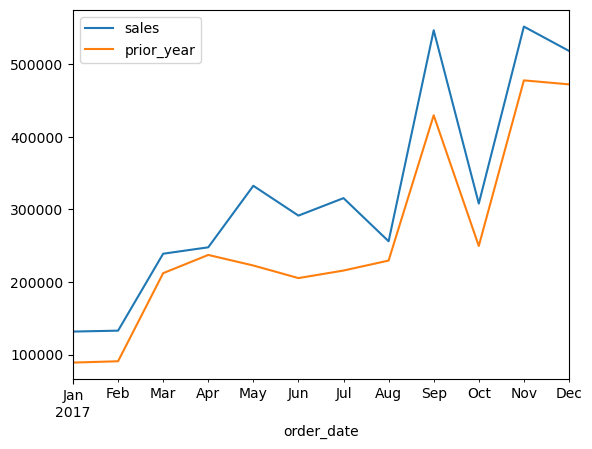

In [210]:
(sale.set_index('order_date').loc[:,['sales']].resample('ME').sum().assign(prior_year = lambda x: x['sales'].shift(12)).loc['2017'].plot())

<Axes: xlabel='order_date'>

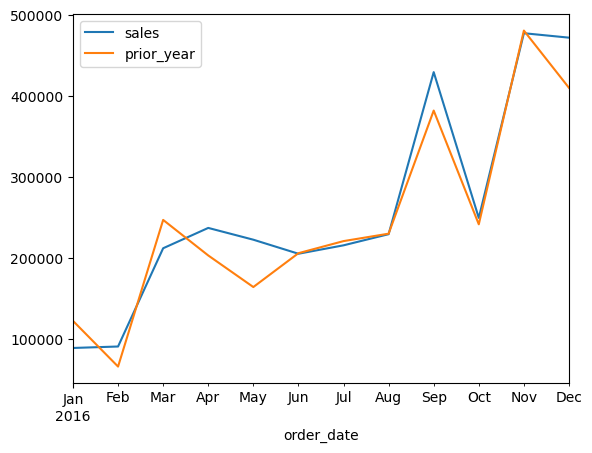

In [211]:
(sale.set_index('order_date').loc[:,['sales']].resample('ME').sum().assign(prior_year = lambda x: x['sales'].shift(12)).loc['2016'].plot())

<Axes: xlabel='order_date'>

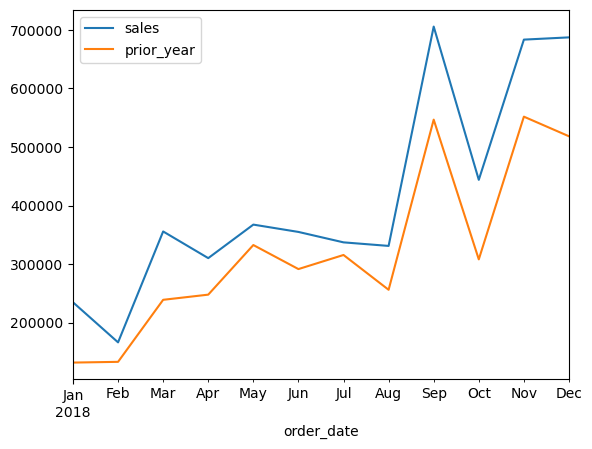

In [212]:
(sale.set_index('order_date').loc[:,['sales']].resample('ME').sum().assign(prior_year = lambda x: x['sales'].shift(12)).loc['2018'].plot())

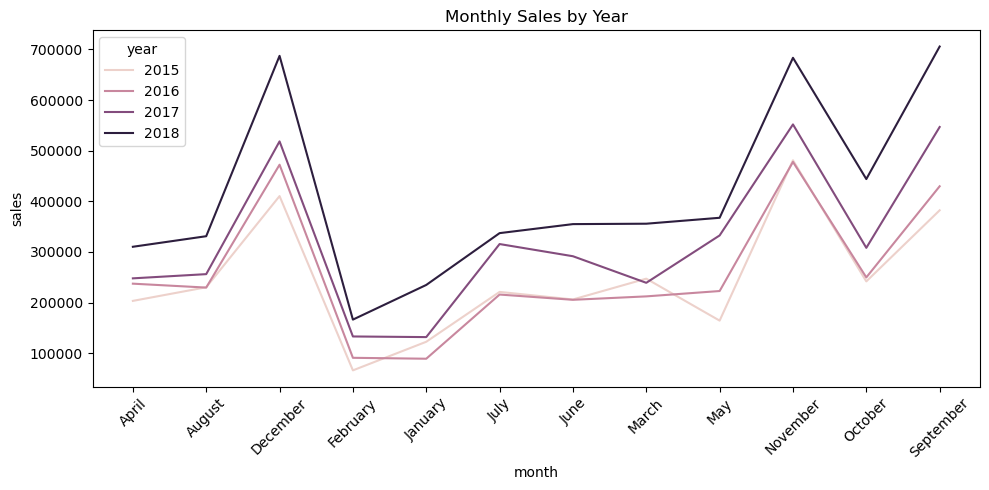

In [213]:
monthly_sales = sale.groupby(['year', 'month'])[['sales']].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='sales', hue='year', data=monthly_sales)
plt.title("Monthly Sales by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **CATEGORY ANALYSIS**

In [218]:
category_sales = sale.groupby('category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)
(category_sales)

# subcat_sales = sale.groupby('sub_category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)
# print(subcat_sales.head(5))

# # Barplot for category-wise sales
# plt.figure(figsize=(8,5))
# sns.barplot(x=category_sales.index, y=category_sales['sales'])
# plt.title("Sales by Category")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


,sales,profit
category,,
"Eggs, Meat & Fish",2267401,567357.22
Snacks,2237546,568178.85
Food Grains,2115272,529162.64
Bakery,2112281,528521.06
Fruits & Veggies,2100727,530400.38
Beverages,2085313,525605.76
Oil & Masala,2038442,497895.29


In [219]:
subcat_sales = sale.groupby('sub_category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)
subcat_sales

,sales,profit
sub_category,,
Health Drinks,1051439,267469.79
Soft Drinks,1033874,258135.97
Cookies,768213,190643.70
Breads & Buns,742586,190764.98
Noodles,735435,193685.81
Chocolates,733898,183849.34
Masalas,697480,168999.11
Cakes,685612,168398.46
Biscuits,684083,169357.62


C:\Users\shikh\AppData\Local\Temp\ipykernel_15632\1023831836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales['sales'], palette="Set2")


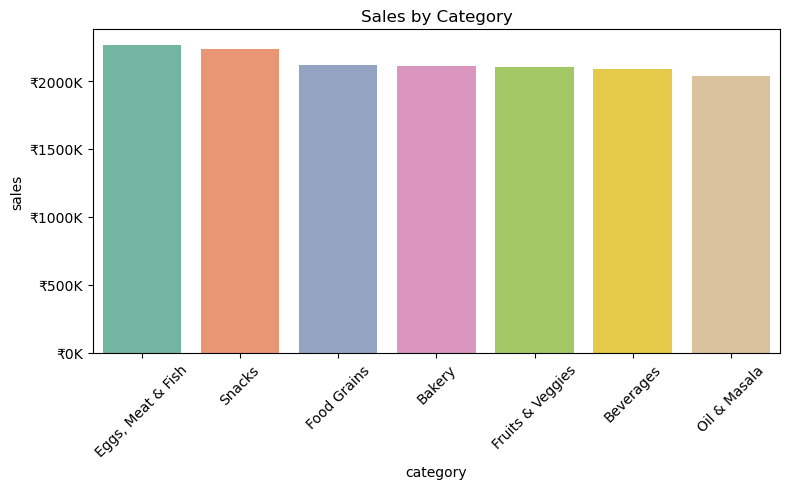

In [223]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales['sales'], palette="Set2")
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'₹{x/1000:.0f}K'))  # Format as '₹000K'
plt.tight_layout()
plt.show()


## **Customer Analysis**

In [225]:
customer_freq = sale['customer_name'].value_counts().head(5)
print("Top 5 Frequent Customers:")
(customer_freq)


Top 5 Frequent Customers:


customer_name
Amrish      227
Krithika    224
Arutra      218
Verma       218
Shah        215
Name: count, dtype: int64

## **Geographical Analysis**


C:\Users\shikh\AppData\Local\Temp\ipykernel_15632\4188336571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales['sales'], y=city_sales.index, palette="coolwarm")


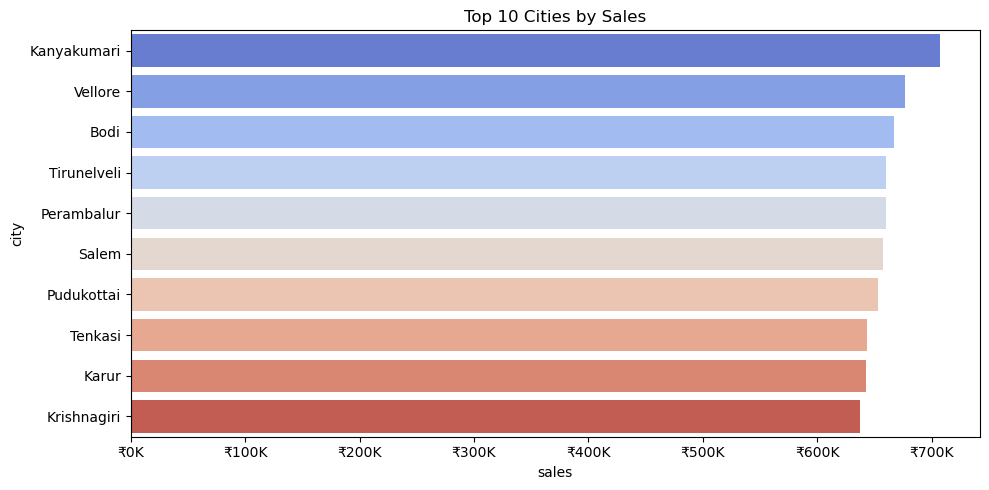

In [227]:
city_sales = sale.groupby('city')[['sales']].sum().sort_values('sales', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=city_sales['sales'], y=city_sales.index, palette="coolwarm")
plt.title("Top 10 Cities by Sales")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'₹{x/1000:.0f}K'))
plt.tight_layout()
plt.show()

## **Region-wise sales**

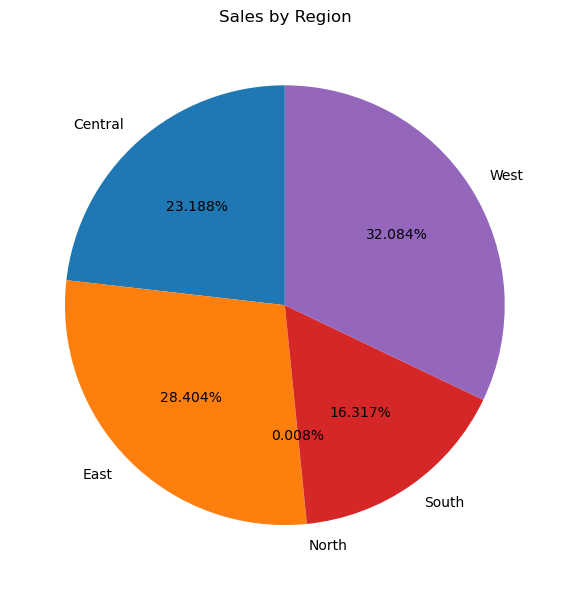

In [248]:
# Region-wise sales
region_sales = sale.groupby('region')[['sales']].sum()
plt.figure(figsize=(6,6))
plt.pie(region_sales['sales'], labels=region_sales.index, autopct=lambda p: f'{p:.3f}%' if p > 0 else '', startangle=90)
plt.title("Sales by Region")
plt.tight_layout()
plt.show()


## **TOP & BOTTOM CUSTOMERS**

In [234]:
print("Top 5 Profitable Orders:")
(sale.sort_values(by='profit', ascending=False).loc[:,['category','sub_category','sales','profit']].head(5))



Top 5 Profitable Orders:


,category,sub_category,sales,profit
3159,Bakery,Cakes,2491,1120.95
3467,Fruits & Veggies,Fresh Fruits,2490,1120.50
3436,Bakery,Breads & Buns,2469,1111.05
8134,Bakery,Biscuits,2452,1103.40
9782,Snacks,Cookies,2450,1102.50


In [240]:
print("Least Profitable Orders:")
(sale.sort_values(by='profit').loc[:,['category','sub_category','sales','profit']].head(5))

Least Profitable Orders:


,category,sub_category,sales,profit
9551,Beverages,Soft Drinks,505,25.25
4750,Bakery,Cakes,509,25.45
5763,"Eggs, Meat & Fish",Eggs,511,25.55
5460,"Eggs, Meat & Fish",Fish,517,25.85
7540,Oil & Masala,Masalas,537,26.85


## **KPI**

In [241]:
total_sales = sale['sales'].sum()
total_profit = sale['profit'].sum()
avg_discount = sale['discount'].mean()
profit_margin = total_profit / total_sales

print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Total Profit: ₹{total_profit:,.2f}")
print(f"Average Discount: {avg_discount:.2%}")
print(f"Profit Margin: {profit_margin:.2%}")


Total Sales: ₹14,956,982.00
Total Profit: ₹3,747,121.20
Average Discount: 22.68%
Profit Margin: 25.05%
